<a href="https://colab.research.google.com/github/Nandhinisureshh/Machine-Learning/blob/main/Bank_Churn_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
%matplotlib inline

In [ ]:
df = pd.read_csv("/content/Churn_Modelling.csv")
df.sample(5)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
3410,3411,15595937,Bruno,430,Germany,Male,36,1,138992.48,2,0,0,122373.42,0
288,289,15727556,O'Donnell,744,Spain,Female,26,5,166297.89,1,1,1,181694.44,0
7187,7188,15662152,Trevisan,552,France,Female,38,9,134105.01,1,0,0,57850.10,0
3729,3730,15697702,Lord,730,Spain,Male,29,2,0.00,2,1,0,14174.09,0
8800,8801,15647890,Su,691,France,Male,37,9,149405.18,1,1,1,146411.60,0


In [ ]:
df.drop('CustomerId',axis='columns',inplace=True)

In [ ]:
df.dtypes

RowNumber            int64
Surname             object
CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [ ]:
df.EstimatedSalary.values

array([101348.88, 112542.58, 113931.57, ...,  42085.58,  92888.52,
        38190.78])

In [ ]:
df.shape

(10000, 13)

In [ ]:
df[df.EstimatedSalary!=' '].shape

(10000, 13)

In [ ]:
df.dtypes

RowNumber            int64
Surname             object
CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [ ]:
df.EstimatedSalary.values

array([101348.88, 112542.58, 113931.57, ...,  42085.58,  92888.52,
        38190.78])

In [ ]:
df[df.Exited==0]

,RowNumber,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
1,2,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
3,4,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
6,7,Bartlett,822,France,Male,50,7,0.00,2,1,1,10062.80,0
8,9,He,501,France,Male,44,4,142051.07,2,0,1,74940.50,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9993,9994,Rahman,644,France,Male,28,7,155060.41,1,1,0,29179.52,0
9994,9995,Wood,800,France,Female,29,2,0.00,2,0,0,167773.55,0
9995,9996,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0


**Data Visualization**

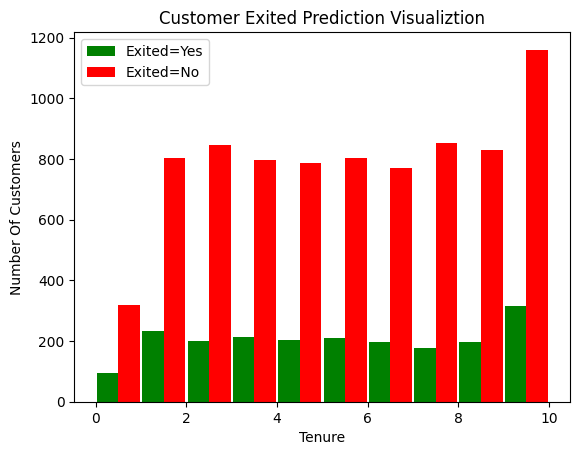

In [ ]:
tenure_Exited_no = df1[df.Exited==0].Tenure
tenure_Exited_yes = df[df.Exited==1].Tenure

plt.xlabel("Tenure")
plt.ylabel("Number Of Customers")
plt.title("Customer Exited Prediction Visualiztion")
plt.hist([tenure_Exited_yes, tenure_Exited_no], rwidth=0.95, color=['green','red'],label=['Exited=Yes','Exited=No'])
plt.legend()

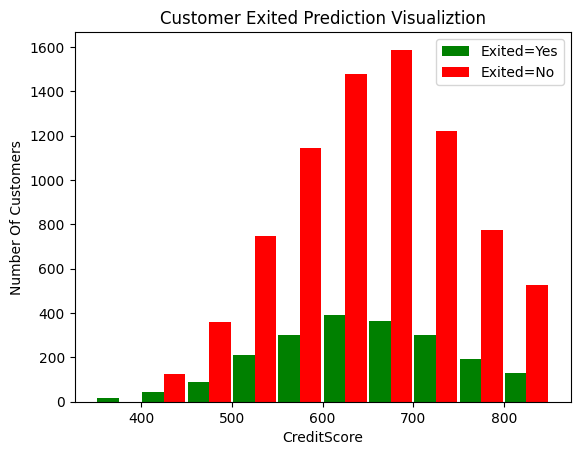

In [ ]:
mc_Exited_no = df[df.Exited==0].CreditScore     
mc_Exited_yes = df[df.Exited==1].CreditScore      

plt.xlabel("CreditScore")
plt.ylabel("Number Of Customers")
plt.title("Customer Exited Prediction Visualiztion")
plt.hist([mc_Exited_yes, mc_Exited_no], rwidth=0.95, color=['green','red'],label=['Exited=Yes','Exited=No'])
plt.legend()

In [ ]:
def print_unique_col_values(df):
       for column in df:
            if df[column].dtypes=='object':
                print(f'{column}: {df[column].unique()}') 

In [ ]:
print_unique_col_values(df)

Surname: ['Hargrave' 'Hill' 'Onio' ... 'Kashiwagi' 'Aldridge' 'Burbidge']
Geography: ['France' 'Spain' 'Germany']
Gender: ['Female' 'Male']


In [ ]:
df['Gender'].replace({'Female':1,'Male':0},inplace=True)

In [ ]:
df.Gender.unique()

array([1, 0])

In [ ]:
df['Geography'].replace({'France':1,'Spain':2,'Germany' :3},inplace=True)

In [ ]:
df.Geography.unique()

array([1, 2, 3])

In [ ]:
df1= pd.get_dummies(data=df, columns=['Surname'])
df1.columns

Index(['RowNumber', 'CreditScore', 'Geography', 'Gender', 'Age', 'Tenure',
       'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember',
       ...
       'Surname_Zinachukwudi', 'Surname_Zito', 'Surname_Zotov',
       'Surname_Zotova', 'Surname_Zox', 'Surname_Zubarev', 'Surname_Zubareva',
       'Surname_Zuev', 'Surname_Zuyev', 'Surname_Zuyeva'],
      dtype='object', length=2944)

In [ ]:
df1.sample(5)

,RowNumber,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,...,Surname_Zinachukwudi,Surname_Zito,Surname_Zotov,Surname_Zotova,Surname_Zox,Surname_Zubarev,Surname_Zubareva,Surname_Zuev,Surname_Zuyev,Surname_Zuyeva
3355,3356,660,3,0,24,5,85089.30,1,1,1,...,0,0,0,0,0,0,0,0,0,0
6815,6816,606,2,0,36,0,94153.56,1,0,1,...,0,0,0,0,0,0,0,0,0,0
3084,3085,770,1,1,30,8,0.00,2,1,0,...,0,0,0,0,0,0,0,0,0,0
2111,2112,642,1,0,25,7,0.00,2,1,0,...,0,0,0,0,0,0,0,0,0,0
8703,8704,661,1,1,31,3,136067.82,2,1,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
df1.dtypes

RowNumber           int64
CreditScore         int64
Geography           int64
Gender              int64
Age                 int64
                    ...  
Surname_Zubarev     uint8
Surname_Zubareva    uint8
Surname_Zuev        uint8
Surname_Zuyev       uint8
Surname_Zuyeva      uint8
Length: 2944, dtype: object

In [ ]:
cols_to_scale = ['Tenure','CreditScore','EstimatedSalary']

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df1[cols_to_scale] = scaler.fit_transform(df1[cols_to_scale])

In [ ]:
for col in df1:
    print(f'{col}: {df1[col].unique()}')

RowNumber: [    1     2     3 ...  9998  9999 10000]
CreditScore: [0.538 0.516 0.304 0.698 1.    0.59  0.944 0.052 0.302 0.668 0.356 0.294
 0.252 0.398 0.57  0.532 0.606 0.474 0.752 0.764 0.572 0.32  0.638 0.992
 0.454 0.812 0.442 0.448 0.122 0.482 0.366 0.406 0.34  0.744 0.25  0.28
 0.908 0.464 0.244 0.23  0.412 0.968 0.62  0.852 0.958 0.574 0.4   0.696
 0.47  0.876 0.61  0.502 0.612 0.75  0.322 0.528 0.784 0.674 0.41  0.506
 0.802 0.462 0.77  0.622 0.65  0.776 0.926 0.614 0.508 0.338 0.628 0.656
 0.814 0.132 0.63  0.854 0.386 0.312 0.286 0.604 0.8   0.758 0.592 0.594
 0.916 0.348 0.838 0.76  0.33  0.846 0.928 0.72  0.126 0.546 0.64  0.544
 0.87  0.51  0.258 0.67  0.376 0.424 0.742 0.556 0.636 0.956 0.648 0.55
 0.164 0.84  0.816 0.89  0.672 0.878 0.478 0.222 0.468 0.458 0.626 0.664
 0.886 0.682 0.27  0.6   0.808 0.37  0.732 0.378 0.712 0.472 0.562 0.734
 0.9   0.666 0.708 0.53  0.634 0.268 0.26  0.456 0.324 0.512 0.494 0.856
 0.328 0.35  0.73  0.46  0.914 0.342 0.818 0.332 0.722 0.536

In [ ]:
X = df1.drop('Exited',axis='columns')
y = df1['Exited']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=5)

In [ ]:
import tensorflow as tf

In [ ]:
from tensorflow import keras

In [ ]:
import tensorflow as tf
from tensorflow import keras


model = keras.Sequential([
    keras.layers.Dense(units=25, activation='relu'),
    keras.layers.Dense(units=20, activation='relu'),
    keras.layers.Dense(units=1, activation='sigmoid')
])

# opt = keras.optimizers.Adam(learning_rate=0.01)

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.fit(X_train, y_train, epochs=100)

Epoch 1/100
250/250 [==============================] - 2s 5ms/step - loss: 16.0279 - accuracy: 0.6787
Epoch 2/100
250/250 [==============================] - 1s 6ms/step - loss: 10.0240 - accuracy: 0.6842
Epoch 3/100
250/250 [==============================] - 1s 4ms/step - loss: 8.1649 - accuracy: 0.6906
Epoch 4/100
250/250 [==============================] - 1s 3ms/step - loss: 7.5128 - accuracy: 0.6986
Epoch 5/100
250/250 [==============================] - 1s 4ms/step - loss: 10.1600 - accuracy: 0.6921
Epoch 6/100
250/250 [==============================] - 1s 3ms/step - loss: 7.0239 - accuracy: 0.7031
Epoch 7/100
250/250 [==============================] - 1s 4ms/step - loss: 4.9376 - accuracy: 0.7109
Epoch 8/100
250/250 [==============================] - 1s 3ms/step - loss: 7.3541 - accuracy: 0.7099
Epoch 9/100
250/250 [==============================] - 1s 4ms/step - loss: 6.7879 - accuracy: 0.7135
Epoch 10/100
250/250 [==============================] - 1s 3ms/step - loss: 5.4621 - acc

In [ ]:
model.evaluate(X_test, y_test)

63/63 [==============================] - 0s 2ms/step - loss: 0.4818 - accuracy: 0.7980


[0.48178830742836, 0.7979999780654907]

In [ ]:
yp = model.predict(X_test)
yp[:5]

63/63 [==============================] - 0s 2ms/step


array([[0.06124686],
       [0.24268346],
       [0.24268346],
       [0.24268346],
       [0.24268346]], dtype=float32)

In [ ]:
y_pred = []
for element in yp:
    if element > 0.5:
        y_pred.append(1)
    else:
        y_pred.append(0)

In [ ]:
from sklearn.metrics import confusion_matrix , classification_report

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.80      0.99      0.89      1595
           1       0.53      0.02      0.05       405

    accuracy                           0.80      2000
   macro avg       0.66      0.51      0.47      2000
weighted avg       0.75      0.80      0.72      2000



Text(95.72222222222221, 0.5, 'Truth')

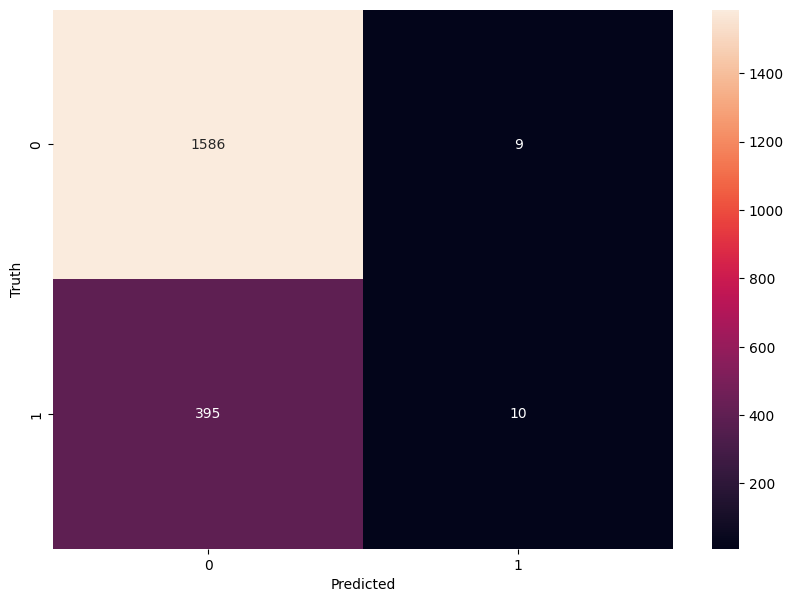

In [ ]:
import seaborn as sn
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_pred)

plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [ ]:
round((1586+10)/(1586+10+395+9),2)

0.8

**Precision for 0 class. i.e. Precision for customers who did not churn**

In [ ]:
round(1586/(1586+395),2)

0.8

**Precision for 1 class. i.e. Precision for customers who actually churned**

In [ ]:
round(10/(10+9),2)

0.53